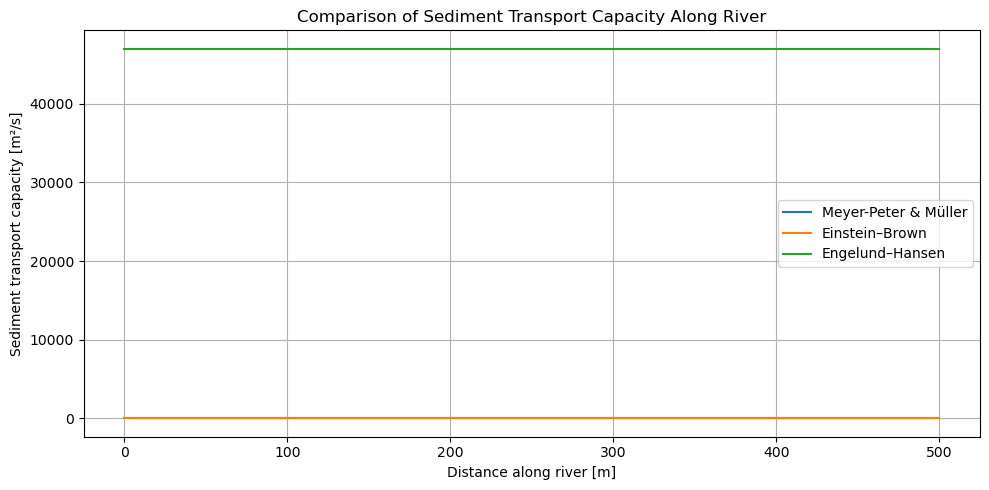

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. CONSTANTS & PARAMETERS

rho = 1000.0        # water density [kg/m3]
rho_s = 2650.0      # sediment density [kg/m3]
g = 9.81            # gravity [m/s2]
d50 = 0.002         # median grain size [m]

Q = 25.0            # discharge [m3/s]
b = 5.0             # channel width [m]
n = 0.035           # Manning roughness [-]

# 2. SIMPLIFIED HYDRAULICS

def normal_depth_rectangular(Q, b, n, S):
    """
    Compute normal depth using Manning's equation
    """
    return ((Q * n) / (b * np.sqrt(S))) ** (3 / 5)

# 3. SYNTHETIC RIVER PROFILE (thalweg substitute)

distance = np.linspace(0, 500, 51)       # [m]
bed_elevation = 100 - 0.001 * distance   # simple linear slope
S = np.gradient(bed_elevation, distance)
S = np.abs(S)


# 4. HYDRAULIC VARIABLES ALONG THE RIVER

depth = normal_depth_rectangular(Q, b, n, S)
U = Q / (b * depth)
tau_b = rho * g * depth * S


# 5. SEDIMENT TRANSPORT FORMULAS

def meyer_peter_muller(tau_b, rho, rho_s, g, d50):
    tau_crit = 0.047 * (rho_s - rho) * g * d50
    qb = np.where(
        tau_b > tau_crit,
        8 * (tau_b - tau_crit) ** 1.5 / ((rho_s - rho) * g),
        0.0
    )
    return qb


def einstein_brown(tau_b, rho, rho_s, g, d50):
    theta = tau_b / ((rho_s - rho) * g * d50)
    qb = 40 * theta**3 * np.sqrt((rho_s - rho) * g * d50**3)
    return qb


def engelund_hansen(U, S, g, d50):
    qb = 0.05 * (U**5) / (g * S * d50)
    return qb

# 6. COMPUTE TRANSPORT CAPACITY

qb_mpm = meyer_peter_muller(tau_b, rho, rho_s, g, d50)
qb_eb  = einstein_brown(tau_b, rho, rho_s, g, d50)
qb_eh  = engelund_hansen(U, S, g, d50)


# 7. VISUALIZATION (comparison plot)

plt.figure(figsize=(10, 5))
plt.plot(distance, qb_mpm, label="Meyer-Peter & Müller")
plt.plot(distance, qb_eb, label="Einstein–Brown")
plt.plot(distance, qb_eh, label="Engelund–Hansen")

plt.xlabel("Distance along river [m]")
plt.ylabel("Sediment transport capacity [m²/s]")
plt.title("Comparison of Sediment Transport Capacity Along River")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()